# Anomaly detection

Będziemy używać zbioru EKG z [PhysioNet](http://physionet.org/physiobank/database/apnea-ecg/). Dokładniejszy opis można znaleźć tu: https://github.com/mrahtz/sanger-machine-learning-workshop

In [1]:
from __future__ import print_function
import ekg_data

ekg_filename = 'data_cl/a02.dat'
ekg_data_save = ekg_data.read_ekg_data(ekg_filename)
print(ekg_data_save.shape)

(3182000,)


Nasze dane to lista liczb

In [2]:
print("ekg_data[0]:\t", ekg_data_save[0])
print("ekg_data[1]:\t", ekg_data_save[1])
print("ekg_data.min:\t", ekg_data_save.min())
print("ekg_data.max:\t", ekg_data_save.max())

ekg_data[0]:	 -4.0
ekg_data[1]:	 -4.0
ekg_data.min:	 -572.0
ekg_data.max:	 580.0


Jest to sygnał więc można go narysować

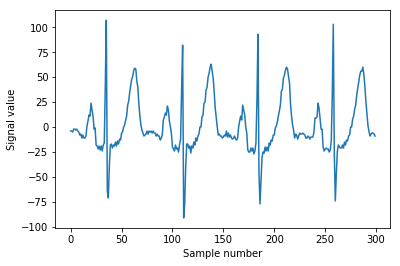

In [5]:
# IPython 'magic' command to set the matplotlib backend to display
# in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

n_samples_to_plot = 300
plt.plot(ekg_data_save[0:n_samples_to_plot])
plt.xlabel("Sample number")
plt.ylabel("Signal value")
plt.show()

Jako zbiór treningowy weźmy kilka pierwszych wartości

In [6]:
ekg_data = ekg_data_save[0:8192]

## Windowing

Żeby pracować z danymi z szeregu czasowego zwykle go okienkujemy. 

ZADANIE: Proszę przekształcić ekg_data do postaci wektorowej - idziemy co 2 i tworzymy wektory długości 32

In [11]:
import numpy as np

segments = []

segment_len = 32
slide_len = 2
for start_pos in range(0, len(ekg_data), slide_len):
    end_pos = start_pos + segment_len
    segment = ekg_data[start_pos:end_pos]
    if len(segment) != segment_len:
        continue
    segments.append(segment)
    


In [23]:
segments

[array([ -4.,  -4.,  -5.,  -2.,  -2.,  -3.,  -2.,  -4.,  -5.,  -8.,  -7.,
        -11.,  -8., -11., -11.,  -9.,   1.,   6.,  12.,  11.,  24.,  17.,
         11.,  -2.,  -1., -18., -19., -22., -19., -23., -19., -24.]),
 array([ -5.,  -2.,  -2.,  -3.,  -2.,  -4.,  -5.,  -8.,  -7., -11.,  -8.,
        -11., -11.,  -9.,   1.,   6.,  12.,  11.,  24.,  17.,  11.,  -2.,
         -1., -18., -19., -22., -19., -23., -19., -24., -18., -16.]),
 array([ -2.,  -3.,  -2.,  -4.,  -5.,  -8.,  -7., -11.,  -8., -11., -11.,
         -9.,   1.,   6.,  12.,  11.,  24.,  17.,  11.,  -2.,  -1., -18.,
        -19., -22., -19., -23., -19., -24., -18., -16.,  40., 107.]),
 array([ -2.,  -4.,  -5.,  -8.,  -7., -11.,  -8., -11., -11.,  -9.,   1.,
          6.,  12.,  11.,  24.,  17.,  11.,  -2.,  -1., -18., -19., -22.,
        -19., -23., -19., -24., -18., -16.,  40., 107., -64., -71.]),
 array([ -5.,  -8.,  -7., -11.,  -8., -11., -11.,  -9.,   1.,   6.,  12.,
         11.,  24.,  17.,  11.,  -2.,  -1., -18., -19.

ZADANIE: Proszę narysować przykładowe segmenty

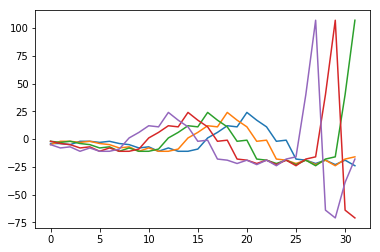

In [17]:
for i in range(5):
    plt.plot(segments[i])
plt.show()

## Clustering

ZADANIE: Poklastrować dane tak żeby znaleźć zbiór typowych/reprezentatywnych fali - weźmy 150 grup

In [19]:
from sklearn.cluster import KMeans

k=150

km = KMeans(n_clusters=k)
km.fit(segments)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=150, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

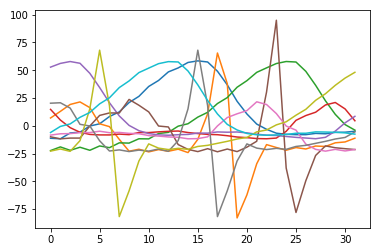

In [22]:
for w in km.cluster_centers_[:10]:
    plt.plot(w)
plt.show()

ZADANIE: Narysować reprezentatów klastrów

In [9]:
#

Fala będzie anomalią jeśli będzie daleko od naszego modelu:
* dla każdej fali szukamy najbliższego centra
* dopasowanie to odległość od najbliższego centra



ZADANIE: Zobaczmy jak wykląda dopasowanie wybranej fali do centra (narysuj dwie fale na jednym rysunku)

In [38]:
X = segments

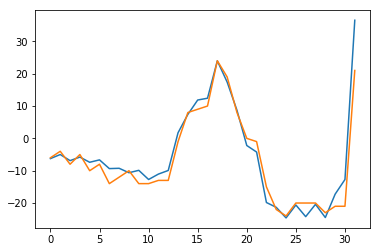

In [29]:
centroids = km.cluster_centers_
nearest_idx = km.predict(X)

i = 600
plt.plot(centroids[nearest_idx[i]])
plt.plot(X[i])
plt.show()


In [39]:
from scipy.spatial.distance import euclidean

error = []
for i in range(len(X)):
    error.append(euclidean(centroids[nearest_idx[i]], X[i]))


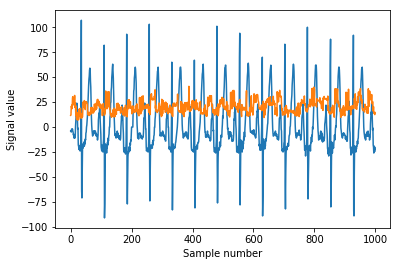

In [40]:


n_samples_to_plot = 1000
plt.plot(ekg_data[0:n_samples_to_plot])
plt.plot(error[0:n_samples_to_plot])
plt.xlabel("Sample number")
plt.ylabel("Signal value")
plt.show()

ZADANIE: Dla zbioru testowego (kolejne 8192 obserwacje) i treningowego policz dopasowanie. Narysuj oryginalną falę i falę dopasowania. Oceń które fale są anomaliami

In [36]:
ekg_data[200:205] = 0

ZADANIE: Stwórz ręcznie anomalię, np. wyzeruj 5 współrzędnych w oryginalnym sygnale - powtórze poprzednie zadanie na takim sygnale

In [37]:
import numpy as np

segments = []

segment_len = 32
slide_len = 2
for start_pos in range(0, len(ekg_data), slide_len):
    end_pos = start_pos + segment_len
    segment = ekg_data[start_pos:end_pos]
    if len(segment) != segment_len:
        continue
    segments.append(segment)
    


In [44]:
X = segments

In [45]:
from scipy.spatial.distance import euclidean

error = []
for i in range(len(X)):
    error.append(euclidean(centroids[nearest_idx[i]], X[i]))


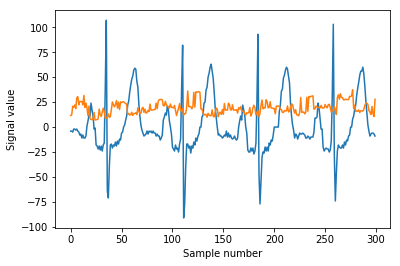

In [46]:


n_samples_to_plot = 300
plt.plot(ekg_data[0:n_samples_to_plot])
plt.plot(error[0:n_samples_to_plot])
plt.xlabel("Sample number")
plt.ylabel("Signal value")
plt.show()